# Reproducibility of the dataset underpinning the Copernicus Interactive Climate Atlas: One indicator in multiple origin datasets

**Please note that this repository is used for development and review, so quality assessments should be considered work in progress until they are merged into the main branch.**

Production date: DD-MM-YYYY

Dataset version: 2.0.

Produced by: C3S2_521 contract.

## 🌍 Use case: Retrieving climate indicators from the Copernicus Interactive Climate Atlas

## ❓ Quality assessment question
* **Are the climate indicators in the dataset underpinning Copernicus Interactive Climate Atlas consistent with their source datasets?**

The [_Copernicus Interactive Climate Atlas_](https://atlas.climate.copernicus.eu/atlas), or _Atlas_ for short, is a C3S web application providing an easy-to-access tool for exploring climate projections, reanalyses, and observational data [[Guti24](https://doi.org/10.21957/ah52ufc369)].
The application allows the user to interact with 12 datasets:

| Type               | Dataset       |
|--------------------|---------------|
| Climate Projection | CMIP6         |
| Climate Projection | CMIP5         |
| Climate Projection | CORDEX-CORE   |
| Climate Projection | CORDEX-EUR-11 |
| Reanalysis         | ERA5          |
| Reanalysis         | ERA5-Land     |
| Reanalysis         | ORAS5         |
| Reanalysis         | CERRA         |
| Observations       | E-OBS         |
| Observations       | BERKEARTH     |
| Observations       | CPC           |
| Observations       | SST-CCI       |

These datasets are provided through an intermediary dataset, the [_Gridded dataset underpinning the Copernicus Interactive Climate Atlas_](https://doi.org/10.24381/cds.h35hb680) or _Atlas dataset_ for short [[AtlasData](https://doi.org/10.24381/cds.h35hb680)].
Compared to their origins, the versions of the climate datasets within the Atlas dataset have been processed following the workflow in Figure {numref}`{number} <multi-origin-c3s-atlas_consistency_q03_workflow-fig>`.

```{figure} attachment:atlas_dataset_workflow.png
---
height: 360px
name: multi-origin-c3s-atlas_consistency_q03_workflow-fig
---
Schematic representation of the workflow for the production of the Atlas dataset from its origin datasets, from the [User-tools for the C3S Atlas](https://ecmwf-projects.github.io/c3s-atlas/chapter01.html).
```

Because a wide range of users interact with climate data through the Atlas application, it is crucial that the underpinning dataset represent its origins correctly.
In other words, the Atlas dataset must be reproducible from its origins.
Here, we assess this reproducibility by comparing climate indicators retrieved from the Atlas dataset with their equivalents calculated from the origin dataset, mirroring the workflow from Figure {numref}`{number} <multi-origin-c3s-atlas_consistency_q03_workflow-fig>`.
While a full reproduction of the Atlas dataset is outside the scope of quality assessment (and would require high-performance computing infrastructure), a case study with a narrower scope probes the reproducibility of the datasets and can be a jumping-off point for further analysis by the reader.

This notebook is part of a series:
| Notebook | Contents |
|---|---|
| [](./derived_multi-origin-c3s-atlas_consistency_q01) | Comparison between Atlas dataset and one origin dataset (CMIP6) for one indicator (`tx35`), including detailed setup. |
| [](./derived_multi-origin-c3s-atlas_consistency_q02) | Comparison between Atlas dataset and one origin dataset (CMIP6) for multiple indicators. |
| [](./derived_multi-origin-c3s-atlas_consistency_q03) | Comparison between Atlas dataset and multiple origin datasets for one indicator. |
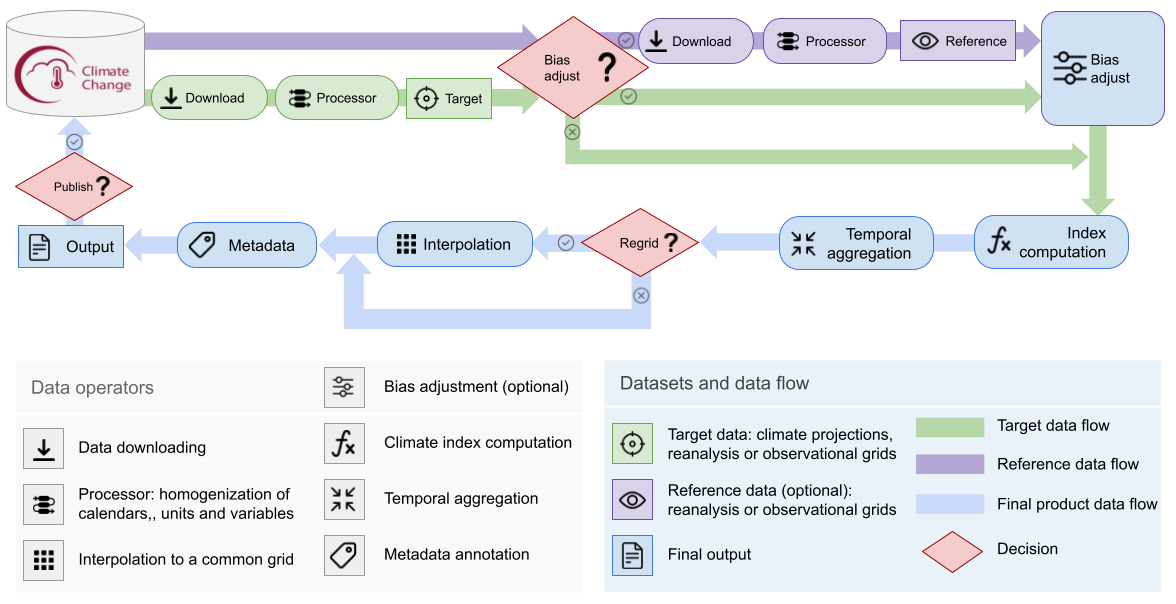

## 📢 Quality assessment statement

```{admonition} These are the key outcomes of this assessment
:class: note
* Finding 1: will be a statement on the findings regarding the consistency 
* Finding 2
* Finding 3
* etc
```

## 📋 Methodology
This quality assessment tests the consistency between climate indicators retrieved from the [_Gridded dataset underpinning the Copernicus Interactive Climate Atlas_](https://doi.org/10.24381/cds.h35hb680) [[AtlasData](https://doi.org/10.24381/cds.h35hb680)] and their equivalents calculated from the origin dataset.

This notebook probes the consistency between the Atlas dataset and multiple origin datasets at the same time.
Due to differences in scope (e.g. atmosphere / land / sea), not every indicator is available in every origin dataset or its Atlas derivative.
Furthermore, some origin datasets are historical while others are future projections.
For this reason, we will examine the following indicators in the following origin datasets:

| Type               | Dataset       | Indicator |
|--------------------|---------------|-----------|
| Climate Projection | CMIP6         | _Monthly count of days with maximum near-surface (2-metre) air temperature above 35 °C_ (`tx35`)
| Climate Projection | CMIP5         | _Monthly count of days with maximum near-surface (2-metre) air temperature above 35 °C_ (`tx35`)
| Climate Projection | CORDEX-CORE   | _Monthly count of days with maximum near-surface (2-metre) air temperature above 35 °C_ (`tx35`)
| Climate Projection | CORDEX-EUR-11 | _Monthly count of days with maximum near-surface (2-metre) air temperature above 35 °C_ (`tx35`)
| Reanalysis         | ERA5          | _Monthly count of days with maximum near-surface (2-metre) air temperature above 35 °C_ (`tx35`)
| Reanalysis         | ERA5-Land     | _Monthly count of days with maximum near-surface (2-metre) air temperature above 35 °C_ (`tx35`)
| Reanalysis         | ORAS5         | Mean sea surface temperature
| Reanalysis         | CERRA         | _Monthly count of days with maximum near-surface (2-metre) air temperature above 35 °C_ (`tx35`)
| Observations       | E-OBS         | _Monthly count of days with maximum near-surface (2-metre) air temperature above 35 °C_ (`tx35`)
| Observations       | BERKEARTH     | _Monthly count of days with maximum near-surface (2-metre) air temperature above 35 °C_ (`tx35`)
| Observations       | CPC           | Mean of daily accumulated precipitation
| Observations       | SST-CCI       | Mean sea surface temperature

The analysis and results are organised in the following steps, which are detailed in the sections below:

**[](section-codesetup)**
 * Install User-tools for the C3S Atlas.
 * Import all required libraries.
 * Definition of helper functions.

**[](section-origin)**
 * Download data from the origin dataset(s).
 * Homogenise data.
 * Calculate indicator(s).
 * Interpolate to a common and regular grid.

**[](section-atlas)**
 * Download data from the Atlas dataset.

**[](section-results)**
 * Compare between the origin and Atlas datasets:
    * Geospatial distribution on native grids
    * Overall distribution on native grids
    * Geospatial distribution on Atlas grid
    * Overall distribution on Atlas grid

## 📈 Analysis and results

(section-codesetup)=
### 1. Code setup
```{note}
This notebook uses [earthkit](https://github.com/ecmwf/earthkit) for 
downloading ([earthkit-data](https://github.com/ecmwf/earthkit-data)) 
and visualising ([earthkit-plots](https://github.com/ecmwf/earthkit-plots)) data.
Because earthkit is in active development, some functionality may change after this notebook is published.
If any part of the code stops functioning, please raise an issue on our GitHub repository so it can be fixed.
```

#### Install the User-tools for the C3S Atlas
This notebook uses the [User-tools for the C3S Atlas](https://github.com/ecmwf-projects/c3s-atlas), which can be installed from GitHub using `pip`.
For convenience, we can do this within the notebook itself.
Further details and alternative options for installing this library are available in its [documentation](https://github.com/ecmwf-projects/c3s-atlas?tab=readme-ov-file#requirements).

In [1]:
!pip install git+https://github.com/ecmwf-projects/c3s-atlas.git

  Cloning https://github.com/ecmwf-projects/c3s-atlas.git to /tmp/pip-req-build-uyycy495
  Running command git clone --filter=blob:none --quiet https://github.com/ecmwf-projects/c3s-atlas.git /tmp/pip-req-build-uyycy495
  Resolved https://github.com/ecmwf-projects/c3s-atlas.git to commit 80256810cb81aa78ab53033479e08cff6a8add44
  Preparing metadata (setup.py) ... done


#### Import required libraries
In this section, we import all the relevant packages needed for running the notebook.

In [2]:
# Input / Output
from pathlib import Path
import earthkit.data as ekd

# General data handling
import numpy as np
import xarray as xr
from functools import partial

# Data pre-processing
from c3s_atlas.fixers import apply_fixers
import c3s_atlas.interpolation as xesmfCICA

# Climate indicators
import xclim
xclim.set_options(cf_compliance="log")  # Mute warnings
import c3s_atlas.indexes
from c3s_atlas.units import VALID_UNITS

# Visualisation
import earthkit.plots as ekp
import matplotlib.pyplot as plt
plt.rcParams["grid.linestyle"] = "--"

# Comparison metrics
# NB we can rewrite these, remove a dependency
from sklearn.metrics import mean_squared_error, mean_absolute_error

/home/nr2/miniforge3/envs/atlasenv/lib/python3.13/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


#### Define indicators

In [3]:
def cal_tx35(ds):
    """ Monthly count of days with maximum near-surface (2-metre) temperature above 35 °C """
    ds_tx35 = xclim.indices.tx_days_above(ds['tasmax'], thresh='35.0 degC', freq='MS', op='>').to_dataset(name='tx35')
    return ds_tx35

def cal_r01(ds):
    """ Monthly count of days with daily accumulated precipitation of liquid water equivalent from all phases above 1 mm """
    pr_flux = ds['pr'].copy().assign_attrs(units = 'mm/day')
    per0 = xr.zeros_like(pr_flux).assign_attrs(units='mm/day')
    ds_r01 = xclim.indices.days_over_precip_thresh(pr_flux, per0, thresh='1 mm/day', freq='MS', bootstrap=False, op='>').to_dataset(name='r01')
    return ds_r01

def cal_sst(ds):
    """ Monthly mean temperature of sea water near the surface """
    ds_sst = ds['tos'].resample(time='MS').mean().to_dataset(name='sst')
    return ds_sst

#### Helper functions

In [4]:
# Type hints
from typing import Iterable, Optional
from earthkit.plots.geo.domains import Domain
AnyDomain = (Domain | str)

In [5]:
# Homogenisation of origin dataset
def homogenise(ds: xr.Dataset, var_name: str, project_id: str) -> xr.Dataset:
    """ Homogenise a dataset `ds` for one variable `var_name` """
    var_mapping = {
                "dataset_variable": {var_name: "data"},
                "aggregation": {"data": "mean"},
        }
    data = apply_fixers(ds, var_name, project_id, var_mapping)
    return data

def homogenise_multiple_variables(ds: xr.Dataset, variable_names: Iterable[str], project_id: str) -> xr.Dataset:
    """ Apply the homogenise function across multiple variables `variable_names` in a dataset `ds` """ 
    homogenised_data = [homogenise(ds, var_name, project_id) for var_name in variable_names]
    homogenised_dataset = xr.merge(homogenised_data, compat="no_conflicts")
    return homogenised_dataset

In [6]:
# Interpolation from native grid to Atlas grid
def interpolate(ds: xr.Dataset, var_name: str) -> xr.Dataset:
    """ Interpolate a dataset `ds` to the Atlas grid for one variable `var_name` """
    int_attr = {"interpolation_method": "conservative_normed", 
                "lats": np.arange(-89.5, 90.5, 1),
                "lons": np.arange(-179.5, 180.5, 1),
                "var_name": var_name,
    }
    INTER = xesmfCICA.Interpolator(int_attr)
    ds_interp = INTER(ds)
    return ds_interp


def interpolate_multiple_variables(ds: xr.Dataset) -> xr.Dataset:
    """ Apply the interpolate function across all variables in a dataset """ 
    # Note: skipping rx5day due to window length error
    data_interpolated = [interpolate(ds, var_name) for var_name in list(ds.data_vars) if var_name != "rx5day"]
    dataset_interpolated = xr.merge(data_interpolated, compat="no_conflicts")
    return dataset_interpolated

(section-origin)=
### 2. Calculate indicator(s) from the origin dataset(s)

#### Download data
This notebook uses [earthkit-data](https://github.com/ecmwf/earthkit-data) to download files from the CDS.
If you intend to run this notebook multiple times, it is highly recommended that you [enable caching](https://earthkit-data.readthedocs.io/en/latest/guide/caching.html) to prevent having to download the same files multiple times.

As described above, we will be data from many different origin datasets.
For clarity,
we first define overarching parameters
(e.g. which years for the historical / future datasets)
and then download each dataset in its own cell.

In [7]:
# General setup
YEARS_HISTORICAL = ["2020"]
YEARS_FUTURE = ["2080"]
MONTHS = [f"{month:02d}" for month in range(1, 13)]
DAYS = [f"{day:02d}" for day in range(1, 32)]

In [8]:
CMIP6_ID = "projections-cmip6"
CMIP6_MODEL = "access_cm2"
request_CMIP6 = {
    "temporal_resolution": "daily",
    "experiment": "ssp5_8_5",
    "model": CMIP6_MODEL,
    "variable": ["daily_maximum_near_surface_air_temperature"],
    "year": YEARS_FUTURE,
    "month": MONTHS,  
    "day": DAYS,
}

data_CMIP6 = ekd.from_source("cds", CMIP6_ID, request_CMIP6)
ds_CMIP6 = data_CMIP6.to_xarray()
ds_CMIP6

2025-09-29 20:09:24,594 INFO [2025-09-03T00:00:00] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
2025-09-29 20:09:24,595 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
Unknown file type, no reader available. path=/tmp/earthkit-data-nr2/cds-d8c4f864a8b41e393fe23f5694bd9fa6f2a154249e1ea7eba118a624d6e58ffe.d/provenance.png magic=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x0b>\x00\x00\x03"\x08\x02\x00\x00\x00\x9a~`*\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xec\xddw' content_type=None


<xarray.Dataset> Size: 40MB
Dimensions:    (time: 366, bnds: 2, lat: 144, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 3kB 2080-01-01T12:00:00 ... 2080-12-31T1...
  * lat        (lat) float64 1kB -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * lon        (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height     float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 6kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 2kB dask.array<chunksize=(144, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 3kB dask.array<chunksize=(192, 2), meta=np.ndarray>
    tasmax     (time, lat, lon) float32 40MB dask.array<chunksize=(1, 144, 192), meta=np.ndarray>
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60265.0
    branch_time_in_parent:  60265.0
    creation_date:          2019-11-08T10:49:05Z
    ...                     ...
    variable_id:            tasmax
    variant_label:          r1i1p1f1
    version:                v20191108
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/b20bdc82-6885-4464-b154-007da646461f
    license:                CMIP6 model data produced by CSIRO is licensed un...

In [9]:
CMIP5_ID = "projections-cmip5-daily-single-levels"
CMIP5_MODEL = "access1_0"
request_CMIP5 = {
    "experiment": "rcp_8_5",
    "variable": ["maximum_2m_temperature_in_the_last_24_hours"],
    "model": CMIP5_MODEL,
    "ensemble_member": "r1i1p1",
    "period": ["20560101-20801231"]
}

data_CMIP5 = ekd.from_source("cds", CMIP5_ID, request_CMIP5)
ds_CMIP5 = data_CMIP5.to_xarray()
ds_CMIP5

2025-09-29 20:09:25,114 INFO [2025-09-03T00:00:00] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
2025-09-29 20:09:25,115 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.


<xarray.Dataset> Size: 1GB
Dimensions:    (time: 9132, bnds: 2, lat: 145, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 73kB 2056-01-01T12:00:00 ... 2080-12-31T...
  * lat        (lat) float64 1kB -90.0 -88.75 -87.5 -86.25 ... 87.5 88.75 90.0
  * lon        (lon) float64 2kB 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
    height     float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 146kB dask.array<chunksize=(9132, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 2kB dask.array<chunksize=(145, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 3kB dask.array<chunksize=(192, 2), meta=np.ndarray>
    tasmax     (time, lat, lon) float32 1GB dask.array<chunksize=(9132, 145, 192), meta=np.ndarray>
Attributes: (12/28)
    institution:            CSIRO (Commonwealth Scientific and Industrial Res...
    institute_id:           CSIRO-BOM
    experiment_id:          rcp85
    source:                 ACCESS1-0 2011. Atmosphere: AGCM v1.0 (N96 grid-p...
    model_id:               ACCESS1-0
    forcing:                GHG, Oz, SA, Sl, Vl, BC, OC, (GHG = CO2, N2O, CH4...
    ...                     ...
    table_id:               Table day (01 February 2012) b6353e9919862612c81d...
    title:                  ACCESS1-0 model output prepared for CMIP5 RCP8.5
    parent_experiment:      historical
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.8.0

In [10]:
# CORDEX EUR
# coredex_eur is a subset of cordex_core
CORDEX_EUR_11_ID = "projections-cordex-domains-single-levels"
CORDEX_EUR_11_MODEL = "NCC_NorESM1-M_REMO"
request_CORDEX_EUR_11 = {
    "domain": "europe",
    "experiment": "rcp_8_5",
    "horizontal_resolution": "0_11_degree_x_0_11_degree",
    "temporal_resolution": "daily_mean",
    "variable": ["maximum_2m_temperature_in_the_last_24_hours"],
    "gcm_model": "ncc_noresm1_m",
    "rcm_model": "gerics_remo2015",
    "ensemble_member": "r1i1p1",
    "start_year": ["2076"],
    "end_year": ["2080"]
}

data_CORDEX_EUR_11 = ekd.from_source("cds", CORDEX_EUR_11_ID, request_CORDEX_EUR_11)
ds_CORDEX_EUR_11 = data_CORDEX_EUR_11.to_xarray()
ds_CORDEX_EUR_11

2025-09-29 20:09:26,603 INFO [2025-09-03T00:00:00] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
2025-09-29 20:09:26,605 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.


<xarray.Dataset> Size: 1GB
Dimensions:                     (time: 1827, bnds: 2, rlat: 412, rlon: 424,
                                 vertices: 4)
Coordinates:
  * time                        (time) datetime64[ns] 15kB 2076-01-01T12:00:0...
  * rlat                        (rlat) float64 3kB -23.38 -23.27 ... 21.72 21.84
  * rlon                        (rlon) float64 3kB -28.38 -28.27 ... 18.04 18.16
    lat                         (rlat, rlon) float32 699kB dask.array<chunksize=(412, 424), meta=np.ndarray>
    lon                         (rlat, rlon) float32 699kB dask.array<chunksize=(412, 424), meta=np.ndarray>
    height                      float64 8B ...
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds                   (time, bnds) datetime64[ns] 29kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    rotated_latitude_longitude  int32 4B ...
    lat_vertices                (rlat, rlon, vertices) float32 3MB dask.array<chunksize=(412, 424, 4), meta=np.ndarray>
    lon_vertices                (rlat, rlon, vertices) float32 3MB dask.array<chunksize=(412, 424, 4), meta=np.ndarray>
    tasmax                      (time, rlat, rlon) float32 1GB dask.array<chunksize=(1, 412, 424), meta=np.ndarray>
Attributes: (12/35)
    institution:                    Helmholtz-Zentrum Geesthacht, Climate Ser...
    institute_id:                   GERICS
    experiment_id:                  rcp85
    source:                         GERICS-REMO2015
    model_id:                       GERICS-REMO2015
    forcing:                        N/A
    ...                             ...
    parent_experiment:              N/A
    modeling_realm:                 atmos
    realization:                    1
    cmor_version:                   2.9.1
    tracking_id:                    hdl:21.14103/c3a4e035-9dcd-429f-a86d-8d53...
    c3s_disclaimer:                 This data has been produced in the contex...

In [11]:
E_OBS_ID = "insitu-gridded-observations-europe"
request_E_OBS = {
    "product_type": "ensemble_mean",
    "variable": ["maximum_temperature"],
    "grid_resolution": "0_25deg",
    "period": "full_period",
    "version": ["30_0e"]
}

data_E_OBS = ekd.from_source("cds", E_OBS_ID, request_E_OBS)
ds_E_OBS = data_E_OBS.to_xarray()
ds_E_OBS = ds_E_OBS.rename({"tx": "tasmax"})
ds_E_OBS

2025-09-29 20:09:26,840 INFO [2025-09-03T00:00:00] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
2025-09-29 20:09:26,841 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.


<xarray.Dataset> Size: 10GB
Dimensions:    (time: 27210, latitude: 201, longitude: 464)
Coordinates:
  * latitude   (latitude) float64 2kB 25.38 25.62 25.88 ... 74.88 75.12 75.38
  * longitude  (longitude) float64 4kB -40.38 -40.12 -39.88 ... 75.12 75.38
  * time       (time) datetime64[ns] 218kB 1950-01-01 1950-01-02 ... 2024-06-30
Data variables:
    tasmax     (time, latitude, longitude) float32 10GB dask.array<chunksize=(1, 201, 464), meta=np.ndarray>
Attributes:
    E-OBS_version:  30.0e
    Conventions:    CF-1.4
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    history:        Fri Aug 30 12:47:29 2024: ncks --no-abc -d time,0,27209 /...
    NCO:            netCDF Operators version 5.1.8 (Homepage = http://nco.sf....

In [12]:
# ERA5
# derived-era5-pressure-levels-daily-statistics ?
ERA5_ID = "reanalysis-era5-single-levels"
request_ERA5 = {
    "product_type": ["reanalysis"],
    "variable": ["maximum_2m_temperature_since_previous_post_processing"],
    "year": YEARS_HISTORICAL,
    "month": MONTHS,  
    "day": DAYS,
    "data_format": "netcdf",
    "download_format": "unarchived",
}

data_ERA5 = ekd.from_source("cds", ERA5_ID, request_ERA5)
ds_ERA5 = data_ERA5.to_xarray()
ds_ERA5 = ds_ERA5.rename({"valid_time": "time"})   # fixes homogenisation error 
ds_ERA5 = ds_ERA5.rename({"mx2t": "tasmax"})   # fixes homogenisation error 
ds_ERA5

2025-09-29 20:09:27,167 INFO [2025-09-03T00:00:00] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
2025-09-29 20:09:27,172 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.


<xarray.Dataset> Size: 2GB
Dimensions:    (time: 366, latitude: 721, longitude: 1440)
Coordinates:
    number     int64 8B ...
  * time       (time) datetime64[ns] 3kB 2020-01-01T12:00:00 ... 2020-12-31T1...
  * latitude   (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver     (time) <U4 6kB dask.array<chunksize=(366,), meta=np.ndarray>
Data variables:
    tasmax     (time, latitude, longitude) float32 2GB dask.array<chunksize=(74, 145, 288), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-09-29T11:02 GRIB to CDM+CF via cfgrib-0.9.1...

In [13]:
# ERA5-Land
#  issue regarding months come back and fix
ERA5_Land_ID = "derived-era5-land-daily-statistics"  # Post-processed, can take a long time on the CDS
request_ERA5_Land = {
    "variable": ["2m_temperature"],
    "year": YEARS_HISTORICAL,
    "month": MONTHS,  # This dataset does not like multi-month requests, maybe we should do 12 separate requests
    "day": DAYS,
    "daily_statistic": "daily_maximum",
    "time_zone": "utc+00:00",
    "frequency": "1_hourly",
}

data_ERA5_Land = ekd.from_source("cds", ERA5_Land_ID, request_ERA5_Land)
ds_ERA5_Land = data_ERA5_Land.to_xarray()
ds_ERA5_Land = ds_ERA5_Land.rename({"valid_time": "time"})   # fixes homogenisation error 
ds_ERA5_Land = ds_ERA5_Land.rename({"t2m": "tasmax"})   # fixes homogenisation error 
ds_ERA5_Land

2025-09-29 20:09:27,379 INFO [2025-09-03T00:00:00] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
2025-09-29 20:09:27,380 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.


<xarray.Dataset> Size: 9GB
Dimensions:    (time: 366, latitude: 1801, longitude: 3600)
Coordinates:
    number     int64 8B ...
  * latitude   (latitude) float64 14kB 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * longitude  (longitude) float64 29kB 0.0 0.1 0.2 0.3 ... 359.7 359.8 359.9
  * time       (time) datetime64[ns] 3kB 2020-01-01 2020-01-02 ... 2020-12-31
Data variables:
    tasmax     (time, latitude, longitude) float32 9GB dask.array<chunksize=(41, 201, 400), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-09-28T23:18 GRIB to CDM+CF via cfgrib-0.9.1...

In [14]:
# ORAS5_ID = "reanalysis-oras5"
# request_ORAS5 = {
#     "product_type": ["operational"],
#     "vertical_resolution": "single_level",
#     "variable": ["sea_surface_temperature"],
#     "year": YEARS_HISTORICAL,
#     "month": MONTHS,
# }

# data_ORAS5 = ekd.from_source("cds", ORAS5_ID, request_ORAS5)
# ds_ORAS5 = data_ORAS5.to_xarray()

# ds_ORAS5

In [15]:
CERRA_ID = "reanalysis-cerra-single-levels"
request_CERRA = {
    "variable": ["maximum_2m_temperature_since_previous_post_processing"],
    "level_type": "surface_or_atmosphere",
    "data_type": ["reanalysis"],
    "product_type": "forecast",
    "year": YEARS_HISTORICAL,
    "month": MONTHS,
    "day": DAYS,
    "time": [
        "00:00", "03:00", "06:00",
        "09:00", "12:00", "15:00",
        "18:00", "21:00"
    ],
    "leadtime_hour": ["1"],
    "data_format": "netcdf",
}

data_CERRA = ekd.from_source("cds", CERRA_ID, request_CERRA)
ds_CERRA = data_CERRA.to_xarray()
ds_CERRA = ds_CERRA.rename({"valid_time": "time"})   # fixes homogenisation error 
ds_CERRA = ds_CERRA.rename({"mx2t": "tasmax"})   # fixes homogenisation error 
ds_CERRA

2025-09-29 20:09:27,598 INFO [2025-09-03T00:00:00] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
2025-09-29 20:09:27,599 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.


<xarray.Dataset> Size: 13GB
Dimensions:    (time: 2928, y: 1069, x: 1069)
Coordinates:
  * time       (time) datetime64[ns] 23kB 2020-01-01T01:00:00 ... 2020-12-31T...
    latitude   (y, x) float64 9MB dask.array<chunksize=(1069, 1069), meta=np.ndarray>
    longitude  (y, x) float64 9MB dask.array<chunksize=(1069, 1069), meta=np.ndarray>
    expver     (time) <U4 47kB dask.array<chunksize=(2928,), meta=np.ndarray>
Dimensions without coordinates: y, x
Data variables:
    tasmax     (time, y, x) float32 13GB dask.array<chunksize=(293, 107, 107), meta=np.ndarray>
Attributes:
    GRIB_centre:             eswi
    GRIB_centreDescription:  Norrkoping
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Norrkoping
    history:                 2025-09-29T10:14 GRIB to CDM+CF via cfgrib-0.9.1...

In [16]:
# SST_CCI_ID = "satellite-sea-surface-temperature-ensemble-product"
# request_SST = 

In [17]:
BERKEARTH_ID = "insitu-gridded-observations-global-and-regional"
request_BERKEARTH = {
    "origin": "berkearth",
    "region": "global",
    "variable": ["temperature_anomaly"],
    "statistic": ["maximum"],
    "time_aggregation": "daily",
    "horizontal_aggregation": ["1_x_1"],
    "year": ["2010"],
    "version": ["v1_0"]
}

data_BERKEARTH = ekd.from_source("cds", BERKEARTH_ID, request_BERKEARTH)
ds_BERKEARTH = data_BERKEARTH.to_xarray()
ds_BERKEARTH["tasmax"].attrs["units"] = "Celsius"
ds_BERKEARTH

2025-09-29 20:09:27,842 INFO [2025-09-03T00:00:00] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
2025-09-29 20:09:27,843 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.


<xarray.Dataset> Size: 95MB
Dimensions:    (time: 365, latitude: 180, longitude: 360)
Coordinates:
  * time       (time) datetime64[ns] 3kB 2010-01-01 2010-01-02 ... 2010-12-31
  * longitude  (longitude) float32 1kB -179.5 -178.5 -177.5 ... 178.5 179.5
  * latitude   (latitude) float32 720B -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
Data variables:
    tasmax     (time, latitude, longitude) float32 95MB dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
Attributes: (12/21)
    CDI:                        Climate Data Interface version 1.9.10 (https:...
    institution:                Berkeley Earth Surface Temperature Project
    Conventions:                Berkeley Earth Internal Convention (based on ...
    title:                      Gridded Berkeley Earth Surface Temperature An...
    source_history:             14-Sep-2020 16:15:39
    comment:                    This file contains surface temperature anomal...
    ...                         ...
    geospatial_lon_resolution:  1.0
    climexp_url:                https://climexp.knmi.nl/select.cgi?berkeley_t...
    history:                    Fri Jun 18 07:44:32 2021: cdo -O -splityear /...
    time_coverage_start:        1880-01-01 00:00:00
    time_coverage_end:          2019-12-31 00:00:00
    CDO:                        Climate Data Operators version 1.9.10 (https:...

In [18]:
CPC_ID = "insitu-gridded-observations-global-and-regional"

#### Homogenise data
One of the steps in the Atlas dataset production chain is homogenisation, i.e. ensuring consistency between data from different origin datasets.
This homogenisation is implemented in the [User-tools for the C3S Atlas](https://github.com/ecmwf-projects/c3s-atlas/tree/main/c3s_atlas), specifically the `c3s_atlas.fixers.apply_fixers` function.
The following changes are applied:

- The names of the spatial coordinates are standardised to `[lon, lat]`.
- Longitude is converted from `[0...360]` to `[-180...180]` format.
- The time coordinate is standardised to the CF standard calendar.
- Variable units are standardised (e.g. °C for temperature).
- Variables are resampled / aggregated to the required temporal resolution.

The homogenisation is applied in the following code cell.
The `apply_fixers` function describes the different homogenisation steps as it applies them.

In [30]:
# Homogenisation of origin dataset

datasets_tx35 = {
    "CMIP5": ds_CMIP5,
    "CMIP6": ds_CMIP6,
    "E_OBS": ds_E_OBS,
    "BERKEARTH": ds_BERKEARTH,
    "CORDEX_EUR_11": ds_CORDEX_EUR_11,
    "ERA5_Land": ds_ERA5_Land,
    "ERA5": ds_ERA5, }
  #  "CERRA": ds_CERRA, }

datasets_tx35_homogenised = [homogenise(ds, "tasmax", key) for key, ds in datasets_tx35.items()]
    

datasets_tx35_homogenised

2025-09-29 20:16:15,505 — Homogenization-fixers — INFO — Dataset has already the correct names for its coordinates
2025-09-29 20:16:15,519 — Homogenization-fixers — INFO — Fixing calendar for <xarray.Dataset> Size: 1GB
Dimensions:    (time: 9132, bnds: 2, lat: 145, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 73kB 2056-01-01T12:00:00 ... 2080-12-31T...
  * lat        (lat) float64 1kB -90.0 -88.75 -87.5 -86.25 ... 87.5 88.75 90.0
  * lon        (lon) float64 2kB 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
    height     float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 146kB dask.array<chunksize=(9132, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 2kB dask.array<chunksize=(145, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 3kB dask.array<chunksize=(192, 2), meta=np.ndarray>
    tasmax     (time, lat, lon) float32 1GB dask.array<chunksize=(9132, 145, 192), meta=np.ndarray>
Attributes: (12/28)


[<xarray.Dataset> Size: 1GB
 Dimensions:  (lat: 145, lon: 192, time: 9132)
 Coordinates:
   * lat      (lat) float64 1kB -90.0 -88.75 -87.5 -86.25 ... 87.5 88.75 90.0
   * lon      (lon) float64 2kB -178.1 -176.2 -174.4 -172.5 ... 176.2 178.1 180.0
   * time     (time) datetime64[ns] 73kB 2056-01-01 2056-01-02 ... 2080-12-31
     height   float64 8B 2.0
 Data variables:
     tasmax   (time, lat, lon) float32 1GB dask.array<chunksize=(9132, 145, 192), meta=np.ndarray>
 Attributes: (12/28)
     institution:            CSIRO (Commonwealth Scientific and Industrial Res...
     institute_id:           CSIRO-BOM
     experiment_id:          rcp85
     source:                 ACCESS1-0 2011. Atmosphere: AGCM v1.0 (N96 grid-p...
     model_id:               ACCESS1-0
     forcing:                GHG, Oz, SA, Sl, Vl, BC, OC, (GHG = CO2, N2O, CH4...
     ...                     ...
     table_id:               Table day (01 February 2012) b6353e9919862612c81d...
     title:                  ACCE

#### Calculate indicator(s)
We calculate the climate indicator(s)
using [xclim](https://xclim.readthedocs.io/en/stable/).
We use the functions defined [above](section-codesetup) to calculate the index.
As before, this function needs to be applied year-by-year, which we do using `groupby`.

In [21]:
indicators_tx35 = [cal_tx35(ds) for ds in datasets_tx35_homogenised]
#indicators_sst
#indicators_precip 

#### Interpolate to a common and regular grid
```{note}
This notebook uses [xESMF](https://github.com/pangeo-data/xESMF) for regridding data.
xESMF is most easily installed using mamba/conda as explained in its documentation.
Users who cannot or do not wish to use mamba/conda will have to manually compile and install [ESMF](https://earthsystemmodeling.org/docs/release/latest/ESMF_usrdoc/node10.html) on their machines, which is not trivial.
In future, this notebook will use [earthkit-regrid](https://github.com/ecmwf/earthkit-regrid) instead, once it reaches suitable maturity.
```

The final step in the processing is regridding and interpolation to a standard grid (Figure {numref}`{number} <multi-origin-c3s-atlas_consistency_q01_workflow-fig>`).
This is performed through a custom function in the [User-tools for the C3S Atlas](https://github.com/ecmwf-projects/c3s-atlas/tree/main/c3s_atlas),
specifically `c3s_atlas.interpolation`.
This function is based on ESMF, as noted above.

Note that the Atlas workflow calculates indicators first, then regrids.
For operations that involve averaging, like smoothing and regridding, the order of operations can affect the result, especially in areas with steep gradients [[Bur20](https://doi.org/10.1364/OE.391470)].
Examples of such areas for a temperature index are coastlines and mountain ranges.
In the case of Atlas, this order of operations was a conscious choice to preserve the "raw" signals,
e.g. preventing extreme temperatures from being smoothed out.
However, it can affect the indicator values and therefore must be considered when using the Atlas application or dataset.

In [22]:
# Interpolation from native grid to Atlas grid
interpolated_tx35 = [interpolate_multiple_variables(ds) for ds in indicators_tx35]
interpolated_tx35

/home/nr2/miniforge3/envs/atlasenv/lib/python3.13/site-packages/xesmf/backend.py:56: UserWarning: Latitude is outside of [-90, 90]
  warnings.warn('Latitude is outside of [-90, 90]')


[<xarray.Dataset> Size: 156MB
 Dimensions:   (lon: 360, lat: 180, time: 300, bnds: 2)
 Coordinates:
   * lon       (lon) float64 3kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
   * lat       (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
   * time      (time) datetime64[ns] 2kB 2056-01-01 2056-02-01 ... 2080-12-01
 Dimensions without coordinates: bnds
 Data variables:
     tx35      (time, lat, lon) int64 156MB dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
     lon_bnds  (lon, bnds) float64 6kB -180.0 -179.0 -179.0 ... 179.0 179.0 180.0
     lat_bnds  (lat, bnds) float64 3kB -90.0 -89.0 -89.0 -88.0 ... 89.0 89.0 90.0
     crs       int64 8B 0
     height    float64 8B 2.0,
 <xarray.Dataset> Size: 6MB
 Dimensions:   (lon: 360, lat: 180, time: 12, bnds: 2)
 Coordinates:
   * lon       (lon) float64 3kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
   * lat       (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
   * time      (time) datetime64[ns] 9

(section-atlas)= 
### 3. Retrieve indicator(s) from the Atlas dataset
Here, we download the same indicator(s) as above directly from the [Gridded dataset underpinning the Copernicus Interactive Climate Atlas](https://doi.org/10.24381/cds.h35hb680) so they can be compared.

In [23]:
# Create requests for multiple daily / monthly variables
def create_requests_for_origins(main_request: dict, origins: Iterable[str]) -> dict:
    """ Given a `main_request` , add all missing entries for every origin. """
    requests = [(main_request | req) for req in origins]
    return requests



In [24]:
# Setup: General request
ATLAS_ID = "multi-origin-c3s-atlas"
BIAS_ADJUSTMENT = "no_bias_adjustment"
VARIABLE = "monthly_extreme_hot_days"

request_atlas = {
    "variable": VARIABLE,
    "bias_adjustment": BIAS_ADJUSTMENT,
}

request_atlas_cmip6 = {
    "origin": "cmip6",
    "experiment": "ssp5_8_5",
    "domain": "global",
    "period": "2015-2100"
}

request_atlas_cmip5 = {
    "origin": "cmip5",
    "experiment": "rcp_8_5",
    "domain": "global",
    "period": "2006-2100",
}

request_cordex_eur_11 = {
    "origin": "cordex_core",
    "experiment": "rcp_8_5",
    "domain": "global_mosaic",
    "period": "2006-2100",
}

request_atlas_era5 = {
    "origin": "era5",
    "domain": "global",
    "period": "1940-2024",
}

request_atlas_era5_land = {
    "origin": "era5_land",
    "domain": "global",
    "period": "1950-2024",
}

request_atlas_cerra = {
    "origin": "cerra",
    "domain": "global",
    "period": "1985-2021",
}

request_atlas_e_obs = {
    "origin": "e_obs",
    "domain": "europe",
    "period": "1950-2021",
}
    
request_atlas_berkearth = {
    "origin": "in_situ_temperature",
    "domain": "global",
    "period": "1881-2017",
}


# origins_list_tx35 = [request_atlas_cmip6, request_atlas_cmip5, request_cordex_eur_11, request_atlas_era5,
#                      request_atlas_era5_land, request_atlas_cerra, request_atlas_e_obs, request_atlas_berkearth]

origins_list_tx35 = [request_atlas_cmip6]

In [25]:
# Download Atlas data

# MODEL_BY_ORIGIN = {
#     "CMIP6": "access_cm2",
#     "CMIP5": "access1_0",
#     "CORDEX-EUR-11": "NCC_NorESM1-M_REMO",
# }

MODEL_BY_ORIGIN = ["access_cm2", "access1_0", "NCC_NorESM1-M_REMO"]

def select_model_from_atlas_dataset(data: xr.Dataset, model: str) -> xr.Dataset:
    """ Select only data for the given model. """
    # Ensure the model ID is provided in the right format
   
    if "member_id" not in data.coords:
        return data
    model = [m.replace("-", "_").lower() for m in model]
    
    if data.attrs.get("source") == "CMIP6":
        m = model[0]
        print(m)
        member_ind = np.where(data.member_id == m)
        data_member = data.sel(member=member_ind).squeeze("member")
        print(data_member)
    if data.attrs.get("source") == "CMIP6":
        m = model[1]
        
    return data_member


    
def _download_atlas_single(request: dict, model: str) -> xr.Dataset:
    """ Helper function for download_atlas_data_oneyear_onemember; download and process a single Atlas request. """
    # Download data
    ATLAS_ID = "multi-origin-c3s-atlas"
    ds = ekd.from_source("cds", ATLAS_ID, request)
    data = ds.to_xarray(compat="equals")
    data = select_model_from_atlas_dataset(data, model)

    # Drop "bnds" variables which can mess with merge later on
    bnds = [var for var in data.data_vars if var.endswith("_bnds")]
    data = data.drop_vars(bnds)

    # Pick out member
    data = select_model_from_atlas_dataset(data, model)
    print(request)

    return data

# tx35 indicators
requests_atlas_origins_tx35 = create_requests_for_origins(request_atlas, origins_list_tx35)


ds_atlas_origins_tx35 = [_download_atlas_single(request, MODEL_BY_ORIGIN) for request in requests_atlas_origins_tx35]

#ds_atlas_origins_tx35 = ekd.from_source("cds", ATLAS_ID, *requests_atlas_origins_tx35)
#data_atlas_origins_tx35 = ds_atlas_origins_tx35.to_xarray(compat="no_conflicts")



data_atlas_origins_tx35

2025-09-29 20:11:16,472 INFO [2025-09-03T00:00:00] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
2025-09-29 20:11:16,473 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
Unknown file type, no reader available. path=/tmp/earthkit-data-nr2/cds-7deea54cd029b78a1407a320c3d444aa8bd43f3bf87866315b8118cd968336c0.d/provenance.png magic=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x08\xf5\x00\x00\x03\x10\x08\x02\x00\x00\x00\xcaqU\xdb\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xec\xddw' content_type=None
/home/nr2/miniforge3/envs/atlasenv/lib/python3.13/site-packages/xarray/conventions.py:204: SerializationWarning: variable 'tx35' has multiple fill values {np.float32(1.0384594e+34), np.float32(-1.7014118e+38)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/

access_cm2


ValueError: Tuple (array([], dtype=int64),) is not in the form (dims, data[, attrs])

(section-results)=
### 4. Results
We now compare the indicator(s) retrieved from the Atlas dataset vs those reproduced from the origin dataset.

We first compare the datasets on their native grids.
This means we cannot do a point-by-point comparison
(because the points are not equivalent),
but we can compare the distributions geospatially and overall.
This probes how well the Atlas dataset reproduces the patterns and trends seen in the origin dataset.

The second comparison uses the regridded version of the indicators derived from the origin dataset.
This makes a point-by-point comparison possible.
It probes how well the overall Atlas workflow (Figure {numref}`{number} <multi-origin-c3s-atlas_consistency_q03_workflow-fig>`) can be reproduced.

In [ ]:
# this cell will contain the global plots for each dataset, 
# would be nice if this showed one and gave the user the option to show whichever they want easily instead of all 12 
# 2 plots being actual values and one plot being the difference 

In [ ]:
# this cell code to calculate metrics 

This will be an interpretation and analysis of the results 

## ℹ️ If you want to know more

### Key resources

List some key resources related to this assessment. E.g. CDS entries, applications, dataset documentation, external pages.
Also list any code libraries used (if applicable).

Code libraries used:
* [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control`,  prepared by [B-Open](https://www.bopen.eu/)

### References
_To be replaced with numerical references once the text is finished_

[[Guti24](https://doi.org/10.21957/ah52ufc369)] J. M. Gutiérrez et al., ‘The Copernicus Interactive Climate Atlas: a tool to explore regional climate change’, ECMWF Newsletter, vol. 181, pp. 38–45, Oct. 2024, doi: 10.21957/ah52ufc369.

[[AtlasData](https://doi.org/10.24381/cds.h35hb680)] Copernicus Climate Change Service, ‘Gridded dataset underpinning the Copernicus Interactive Climate Atlas’. Copernicus Climate Change Service (C3S) Climate Data Store (CDS), Jun. 17, 2024. doi: 10.24381/cds.h35hb680.

[[Bur20](https://doi.org/10.1364/OE.391470)] O. Burggraaff, ‘Biases from incorrect reflectance convolution’, Optics Express, vol. 28, no. 9, pp. 13801–13816, Apr. 2020, doi: 10.1364/OE.391470.